In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import json

In [11]:
with open('wn.json', 'r') as f:
    wallet_data = json.load(f)


df = pd.DataFrame.from_dict(wallet_data, orient='index')

# %% 
# Разделим на признаки и метку
X = df.drop(columns=['target'])
y = df['target']

# %% 
# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

=== Logistic Regression ===
Accuracy: 0.8701298701298701
ROC AUC: 0.9314868804664723
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        49
           1       0.95      0.68      0.79        28

    accuracy                           0.87        77
   macro avg       0.90      0.83      0.85        77
weighted avg       0.88      0.87      0.86        77



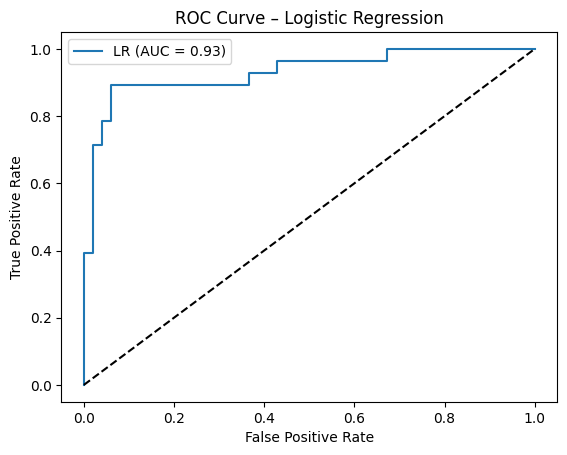

In [13]:

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Метрики
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

# ROC-кривая
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

=== Random Forest ===
Accuracy: 0.8961038961038961
ROC AUC: 0.9777696793002916
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.88      0.82      0.85        28

    accuracy                           0.90        77
   macro avg       0.89      0.88      0.89        77
weighted avg       0.90      0.90      0.90        77



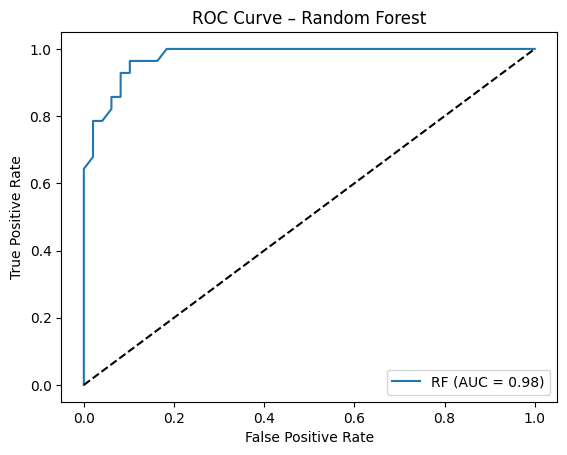

In [15]:
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


In [16]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

=== Support Vector Machine ===
Accuracy: 0.8051948051948052
ROC AUC: 0.9380466472303208
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        49
           1       0.88      0.54      0.67        28

    accuracy                           0.81        77
   macro avg       0.83      0.75      0.76        77
weighted avg       0.82      0.81      0.79        77



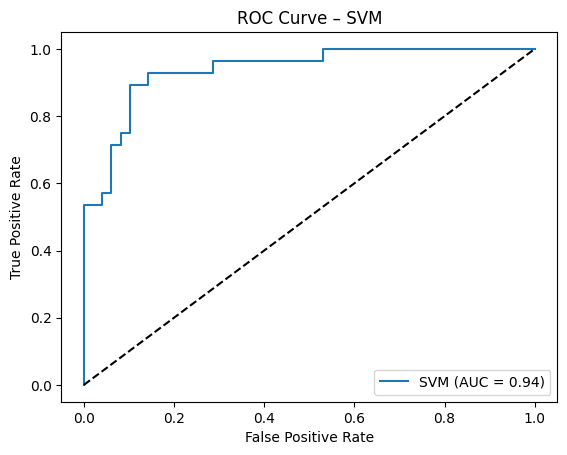

In [17]:
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]
print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print(classification_report(y_test, y_pred_svm))

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_score(y_test, y_prob_svm):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend()
plt.show()
